In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()

import warnings
warnings.filterwarnings('ignore')


In [13]:
pd.set_option('display.max_rows', None)

In [14]:
data=pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
data

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.500,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.000,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.200,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.000,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.000,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
5,IND,India,AKRIMOTA LIG,IND0000003,250.000,23.7689,68.6447,Coal,Oil,NaN,...,2019.0,NaN,1153.421000,1208.852000,1175.765000,1147.913000,976.655000,NaN,Central Electricity Authority,NaN
6,IND,India,ALIYAR,IND0000004,60.000,10.4547,77.0078,Hydro,NaN,NaN,...,2019.0,NaN,157.558250,152.195200,61.421350,89.629600,48.327150,NaN,Central Electricity Authority,NaN
7,IND,India,ALLAIN DUHANGAN,IND0000005,192.000,32.2258,77.2070,Hydro,NaN,NaN,...,2019.0,NaN,674.391100,721.335200,675.724400,679.594950,579.318850,NaN,Central Electricity Authority,NaN
8,IND,India,ALMATTI DAM,IND0000006,290.000,16.3300,75.8863,Hydro,NaN,NaN,...,2019.0,NaN,480.594950,144.434200,402.029750,439.372100,406.377900,NaN,Central Electricity Authority,NaN
9,IND,India,AMAR KANTAK,IND0000007,210.000,23.1642,81.6373,Coal,Oil,NaN,...,2019.0,NaN,1887.904000,1643.046000,1338.093000,1563.457000,1487.880000,NaN,Central Electricity Authority,NaN


In [15]:
data.info()
data.shape
data.primary_fuel
data.capacity_mw


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

0         2.500
1        98.000
2        39.200
3       135.000
4      1800.000
5       250.000
6        60.000
7       192.000
8       290.000
9       210.000
10     1350.000
11      134.000
12     1200.000
13       16.950
14        9.000
15     2630.000
16      419.330
17      600.000
18     1200.000
19       10.000
20       17.000
21       24.000
22      652.000
23      600.000
24       46.000
25       50.000
26        1.000
27       16.500
28       50.000
29      113.600
30       19.800
31       13.200
32        5.000
33        5.000
34        5.000
35        5.000
36        5.000
37        5.000
38        5.000
39      705.000
40       28.000
41      450.000
42      450.000
43      180.000
44     1050.000
45      600.000
46      510.000
47       67.500
48       10.000
49      300.000
50      335.000
51       12.000
52      315.000
53       30.000
54       60.000
55       20.000
56       20.000
57     1200.000
58       42.000
59      720.000
60       90.000
61     1320.000
62      

In [16]:
data=data.drop(columns=['country'])
data=data.drop(columns=['country_long'])
data.shape
data.name.value_counts()
data=data.drop(columns=['name'])
data.shape
data.info()
data.gppd_idnr.value_counts()
data=data.drop(columns=['gppd_idnr'])
data=data.drop(columns=['other_fuel2'])
data=data.drop(columns=['other_fuel1'])
data=data.drop(columns=['other_fuel3'])
data=data.drop(columns=['owner'])
data=data.drop(columns=['commissioning_year'])
data=data.drop(columns=['url'])
data=data.drop(columns=['wepp_id'])
data=data.drop(columns=['generation_gwh_2013'])
data=data.drop(columns=['year_of_capacity_data'])
data=data.drop(columns=['generation_gwh_2019'])
data=data.drop(columns=['generation_data_source'])
data=data.drop(columns=['estimated_generation_gwh'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gppd_idnr                 907 non-null    object 
 1   capacity_mw               907 non-null    float64
 2   latitude                  861 non-null    float64
 3   longitude                 861 non-null    float64
 4   primary_fuel              907 non-null    object 
 5   other_fuel1               198 non-null    object 
 6   other_fuel2               1 non-null      object 
 7   other_fuel3               0 non-null      float64
 8   commissioning_year        527 non-null    float64
 9   owner                     342 non-null    object 
 10  source                    907 non-null    object 
 11  url                       907 non-null    object 
 12  geolocation_source        888 non-null    object 
 13  wepp_id                   0 non-null      float64
 14  year_of_ca

In [44]:
data=data.drop(columns=['latitude'])
data=data.drop(columns=['longitude'])
data=data.drop(columns=['geolocation_source'])
data=data.drop(columns=['source'])

KeyError: "['latitude'] not found in axis"

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             861 non-null    float64
 2   longitude            861 non-null    float64
 3   primary_fuel         907 non-null    object 
 4   source               907 non-null    object 
 5   geolocation_source   888 non-null    object 
 6   generation_gwh_2014  398 non-null    float64
 7   generation_gwh_2015  422 non-null    float64
 8   generation_gwh_2016  434 non-null    float64
 9   generation_gwh_2017  440 non-null    float64
 10  generation_gwh_2018  448 non-null    float64
dtypes: float64(8), object(3)
memory usage: 78.1+ KB


In [17]:
df=lab_enc.fit_transform(data['primary_fuel'])
data['primary_fuel']=df
data
df=lab_enc.fit_transform(data['source'])
data['source']=df
data
df=lab_enc.fit_transform(data['geolocation_source'])
data['geolocation_source']=df
data

,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.500,28.1839,73.2407,6,109,1,NaN,NaN,NaN,NaN,NaN
1,98.000,24.7663,74.6090,1,174,2,NaN,NaN,NaN,NaN,NaN
2,39.200,21.9038,69.3732,7,21,2,NaN,NaN,NaN,NaN,NaN
3,135.000,23.8712,91.3602,2,22,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.000,21.9603,82.4091,1,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
5,250.000,23.7689,68.6447,1,22,2,1153.421000,1208.852000,1175.765000,1147.913000,976.655000
6,60.000,10.4547,77.0078,3,22,2,157.558250,152.195200,61.421350,89.629600,48.327150
7,192.000,32.2258,77.2070,3,22,2,674.391100,721.335200,675.724400,679.594950,579.318850
8,290.000,16.3300,75.8863,3,22,2,480.594950,144.434200,402.029750,439.372100,406.377900
9,210.000,23.1642,81.6373,1,22,2,1887.904000,1643.046000,1338.093000,1563.457000,1487.880000


In [8]:
data['geolocation_source']

0      1
1      2
2      2
3      2
4      2
5      2
6      2
7      2
8      2
9      2
10     2
11     2
12     2
13     2
14     2
15     2
16     2
17     2
18     2
19     2
20     2
21     2
22     2
23     2
24     2
25     3
26     0
27     2
28     0
29     2
30     2
31     2
32     0
33     0
34     0
35     0
36     0
37     0
38     0
39     2
40     2
41     2
42     2
43     2
44     2
45     2
46     2
47     2
48     2
49     2
50     2
51     2
52     2
53     2
54     2
55     2
56     2
57     2
58     2
59     2
60     2
61     2
62     2
63     2
64     2
65     2
66     2
67     3
68     2
69     2
70     2
71     2
72     2
73     2
74     2
75     2
76     2
77     2
78     2
79     2
80     2
81     2
82     2
83     2
84     2
85     2
86     2
87     2
88     2
89     2
90     2
91     2
92     2
93     2
94     2
95     2
96     2
97     2
98     2
99     2
100    2
101    2
102    2
103    2
104    2
105    2
106    2
107    2
108    2
109    2
110    2
1

In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             861 non-null    float64
 2   longitude            861 non-null    float64
 3   primary_fuel         907 non-null    int32  
 4   other_fuel3          0 non-null      float64
 5   source               907 non-null    int32  
 6   geolocation_source   907 non-null    int32  
 7   generation_gwh_2014  398 non-null    float64
 8   generation_gwh_2015  422 non-null    float64
 9   generation_gwh_2016  434 non-null    float64
 10  generation_gwh_2017  440 non-null    float64
 11  generation_gwh_2018  448 non-null    float64
dtypes: float64(9), int32(3)
memory usage: 74.5 KB


In [18]:
new_data=data

In [19]:
new_data.dropna(axis=0,inplace=True)

In [20]:
new_data

,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
3,135.000,23.8712,91.3602,2,22,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.000,21.9603,82.4091,1,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
5,250.000,23.7689,68.6447,1,22,2,1153.421000,1208.852000,1175.765000,1147.913000,976.655000
6,60.000,10.4547,77.0078,3,22,2,157.558250,152.195200,61.421350,89.629600,48.327150
7,192.000,32.2258,77.2070,3,22,2,674.391100,721.335200,675.724400,679.594950,579.318850
8,290.000,16.3300,75.8863,3,22,2,480.594950,144.434200,402.029750,439.372100,406.377900
9,210.000,23.1642,81.6373,1,22,2,1887.904000,1643.046000,1338.093000,1563.457000,1487.880000
10,1350.000,21.0782,77.9009,1,22,2,1920.971000,5629.663000,1701.008000,4350.558000,3717.154000
11,134.000,31.2717,76.4938,3,22,2,614.412500,665.197300,670.500650,644.570950,425.641100
12,1200.000,24.2007,82.8000,1,22,2,7744.000000,8076.810500,7902.021600,7940.740000,7873.973000


In [21]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 385 entries, 3 to 899
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          385 non-null    float64
 1   latitude             385 non-null    float64
 2   longitude            385 non-null    float64
 3   primary_fuel         385 non-null    int32  
 4   source               385 non-null    int32  
 5   geolocation_source   385 non-null    int32  
 6   generation_gwh_2014  385 non-null    float64
 7   generation_gwh_2015  385 non-null    float64
 8   generation_gwh_2016  385 non-null    float64
 9   generation_gwh_2017  385 non-null    float64
 10  generation_gwh_2018  385 non-null    float64
dtypes: float64(8), int32(3)
memory usage: 31.6 KB


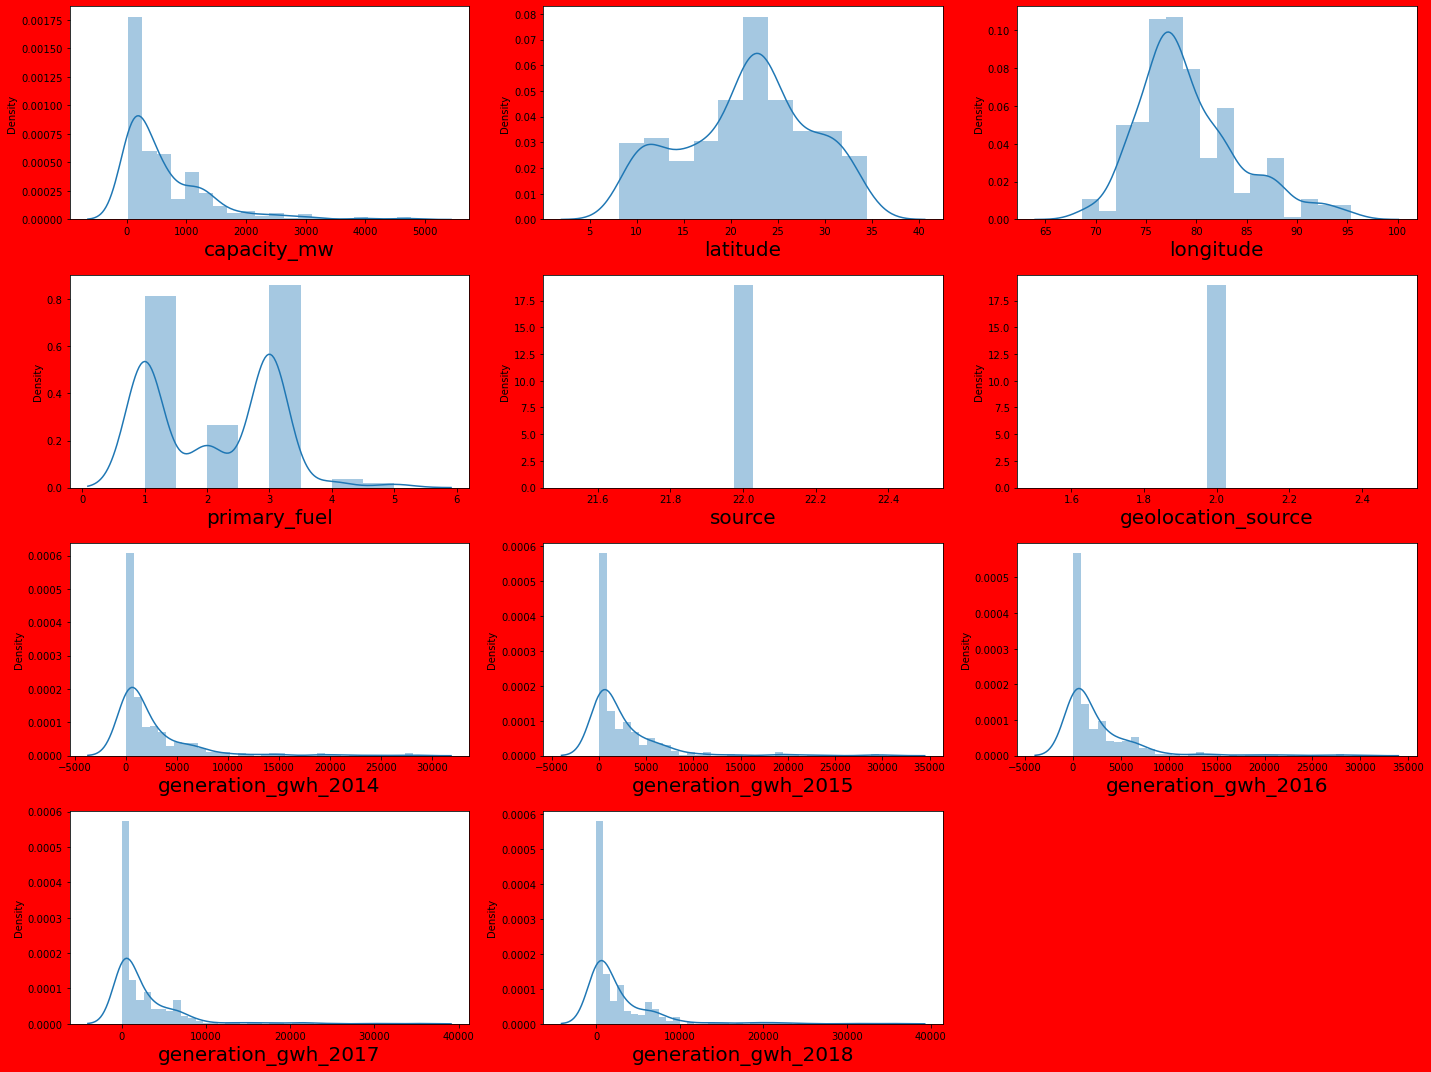

In [22]:
plt.figure(figsize=(20,15), facecolor='red')
plotnumber = 1

for column in data:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)#Print in 2 rows and 4 columns plotnumer = position
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [47]:
x=new_data.drop(columns=['primary_fuel'])
y=new_data['primary_fuel']
z=new_data.drop(columns=['capacity_mw'])
w=new_data['capacity_mw']

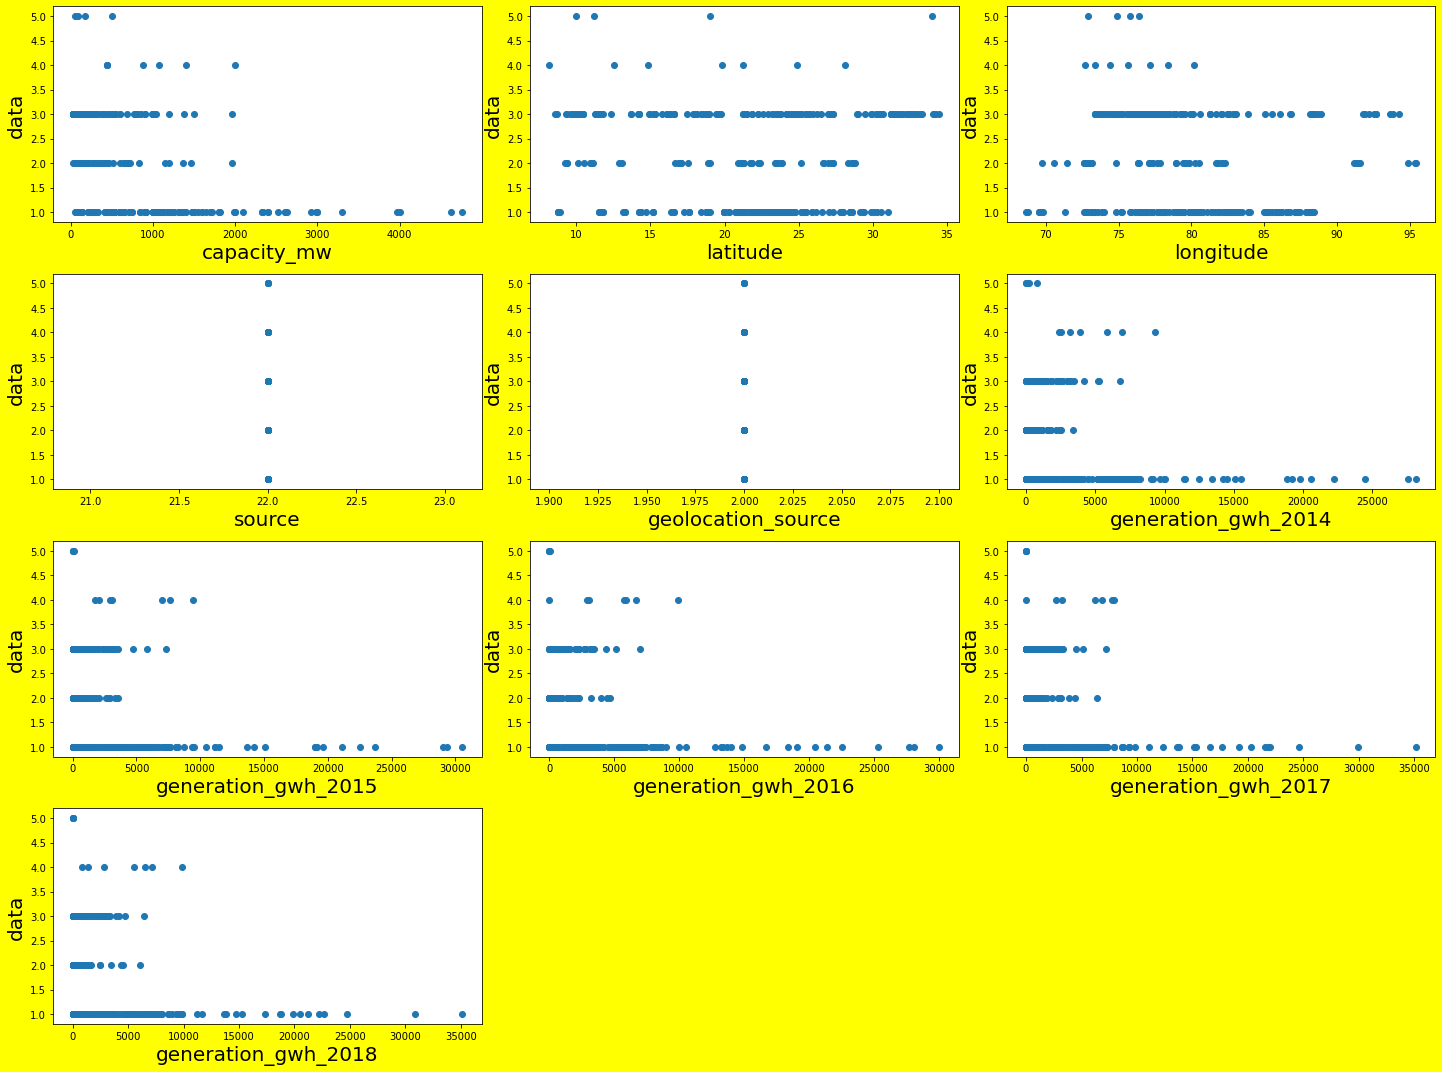

In [24]:
plt.figure(figsize=(20,15), facecolor='yellow')
plotnumber = 1

for column in x:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('data',fontsize=20)
    plotnumber+=1
plt.tight_layout()

KeyError: 0

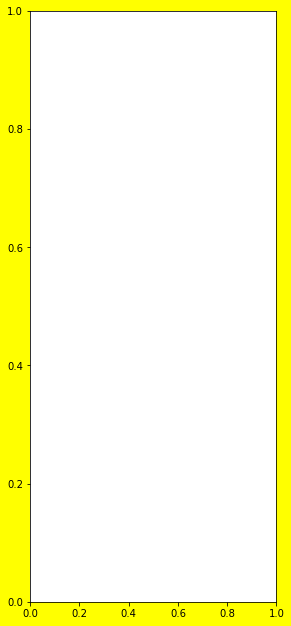

In [25]:
plt.figure(figsize=(15,50), facecolor='yellow')
graph=1

for column in x:
    if graph<=12:
        ax=plt.subplot(4,3,graph)
        #sns.boxplot(df_features[column],orient='v')
        ax=sns.boxplot(data=x[column])
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

In [162]:
data.describe()

,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,385.000000,385.000000,385.000000,385.000000,385.0,385.0,385.000000,385.000000,385.000000,385.000000,385.000000
mean,640.274743,21.696279,79.268877,2.090909,22.0,2.0,2510.685975,2636.161828,2663.578355,2705.235164,2797.870947
std,743.287233,6.750157,5.107958,0.999763,0.0,0.0,4070.550482,4332.263829,4341.935961,4384.682560,4539.626068
min,26.000000,8.169100,68.644700,1.000000,22.0,2.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,114.750000,16.640000,76.141800,1.000000,22.0,2.0,251.943950,252.501150,210.930050,203.596900,229.874850
50%,394.000000,22.325600,77.980000,2.000000,22.0,2.0,882.664500,909.000000,933.370000,858.734750,940.390000
75%,1000.000000,26.487500,82.293000,3.000000,22.0,2.0,3107.282000,3378.120000,3365.746000,3459.695000,3319.054000
max,4760.000000,34.490300,95.408000,5.000000,22.0,2.0,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


In [27]:
#Find the outliers from the data

#1st quantile for the whole data set / for all the features we will get it
q1=new_data.quantile(0.25)

#3rd Quantile
q3=new_data.quantile(0.75)

iqr=q3-q1

In [28]:
source_high=q3.source +(1.5*iqr.source)
source_high

22.0

In [29]:
generation_gwh_2014_high=q3.generation_gwh_2014 +(1.5*iqr.generation_gwh_2014)
generation_gwh_2014_high

generation_gwh_2015_high=q3.generation_gwh_2015 +(1.5*iqr.generation_gwh_2015)
generation_gwh_2015_high

generation_gwh_2016_high=q3.generation_gwh_2016 +(1.5*iqr.generation_gwh_2016)
generation_gwh_2016_high

generation_gwh_2017_high=q3.generation_gwh_2017 +(1.5*iqr.generation_gwh_2017)
generation_gwh_2017_high

generation_gwh_2018_high=q3.generation_gwh_2018 +(1.5*iqr.generation_gwh_2018)
generation_gwh_2018_high

7952.822725

In [30]:
index=np.where(new_data['source']> source_high)

new_data=new_data.drop(new_data.index[index])

index=np.where(new_data['generation_gwh_2014']> generation_gwh_2014_high)

new_data=new_data.drop(new_data.index[index])

index=np.where(new_data['generation_gwh_2015']> generation_gwh_2015_high)

new_data=new_data.drop(new_data.index[index])

index=np.where(new_data['generation_gwh_2016']> generation_gwh_2016_high)

new_data=new_data.drop(new_data.index[index])

index=np.where(new_data['generation_gwh_2017']> generation_gwh_2017_high)

new_data=new_data.drop(new_data.index[index])

index=np.where(new_data['generation_gwh_2018']> generation_gwh_2018_high)

new_data=new_data.drop(new_data.index[index])



KeyError: 'primary_fuel'

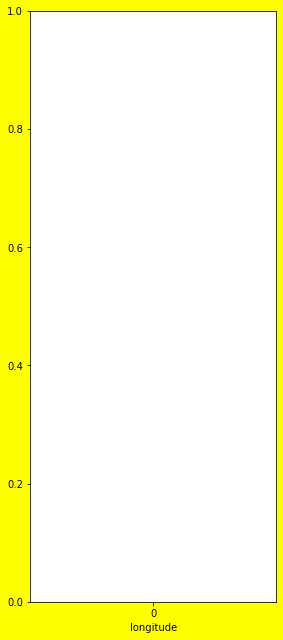

In [34]:
plt.figure(figsize=(15,50), facecolor='yellow')
graph1=1

for column in new_data:
    if graph1<=12:
        ax=plt.subplot(4,3,graph)
        #sns.boxplot(df_features[column],orient='v')
        ax=sns.boxplot(new_data=x[column])
        plt.xlabel(column,fontsize=10)
    graph1+=1
plt.show()

In [35]:
new_data.describe()

,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,346.000000,346.000000,346.000000,346.000000,346.0,346.0,346.000000,346.000000,346.000000,346.000000,346.000000
mean,469.901087,21.625759,79.193046,2.205202,22.0,2.0,1536.577045,1592.997753,1589.406511,1636.246391,1661.484142
std,468.620978,6.971545,5.202483,0.978657,0.0,0.0,1843.357232,1892.202704,1905.899910,1985.497977,2012.572696
min,26.000000,8.169100,68.644700,1.000000,22.0,2.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,100.000000,16.391550,75.956600,1.000000,22.0,2.0,211.753775,206.004800,188.292065,177.411410,201.733763
50%,300.000000,22.285300,77.795800,3.000000,22.0,2.0,665.933600,668.440000,677.396000,643.136000,617.609464
75%,654.250000,27.017000,81.989550,3.000000,22.0,2.0,2444.449000,2659.669375,2517.777500,2680.027500,2703.281250
max,2520.000000,34.490300,95.408000,5.000000,22.0,2.0,7368.390000,7645.550000,8081.514000,7894.400000,7582.300000


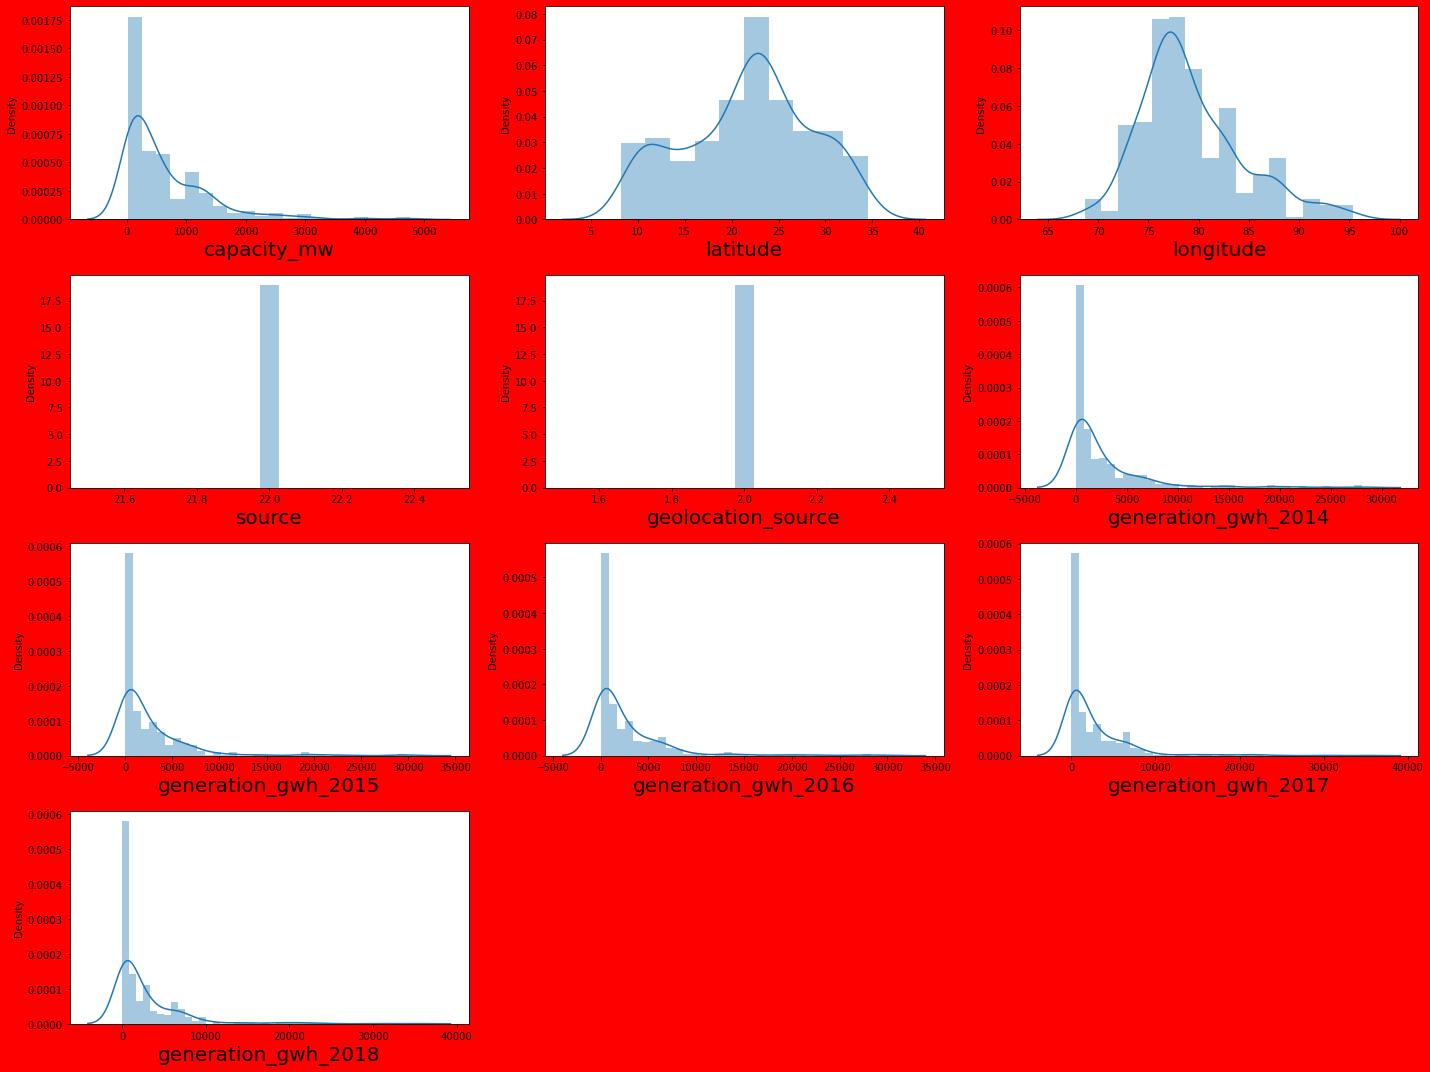

In [37]:
plt.figure(figsize=(20,15), facecolor='red')
plotnumber = 1

for column in x:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)#Print in 2 rows and 4 columns plotnumer = position
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [45]:
new_data=new_data.drop(columns=['latitude'])
new_data=new_data.drop(columns=['longitude'])
new_data=new_data.drop(columns=['geolocation_source'])
new_data=new_data.drop(columns=['source'])

In [38]:
q1=new_data.quantile(0.25)

#3rd Quantile
q3=new_data.quantile(0.75)

iqr=q3-q1

In [39]:
source_high=q3.source +(1.5*iqr.source)
source_high

22.0

In [40]:
generation_gwh_2014_high=q3.generation_gwh_2014 +(1.5*iqr.generation_gwh_2014)
generation_gwh_2014_high

generation_gwh_2015_high=q3.generation_gwh_2015 +(1.5*iqr.generation_gwh_2015)
generation_gwh_2015_high

generation_gwh_2016_high=q3.generation_gwh_2016 +(1.5*iqr.generation_gwh_2016)
generation_gwh_2016_high

generation_gwh_2017_high=q3.generation_gwh_2017 +(1.5*iqr.generation_gwh_2017)
generation_gwh_2017_high

generation_gwh_2018_high=q3.generation_gwh_2018 +(1.5*iqr.generation_gwh_2018)
generation_gwh_2018_high

6455.60248125

In [41]:
index=np.where(new_data['source']> source_high)

new_data=new_data.drop(new_data.index[index])

index=np.where(new_data['generation_gwh_2014']> generation_gwh_2014_high)

new_data=new_data.drop(new_data.index[index])

index=np.where(new_data['generation_gwh_2015']> generation_gwh_2015_high)

new_data=new_data.drop(new_data.index[index])

index=np.where(new_data['generation_gwh_2016']> generation_gwh_2016_high)

new_data=new_data.drop(new_data.index[index])

index=np.where(new_data['generation_gwh_2017']> generation_gwh_2017_high)

new_data=new_data.drop(new_data.index[index])

index=np.where(new_data['generation_gwh_2018']> generation_gwh_2018_high)

new_data=new_data.drop(new_data.index[index])

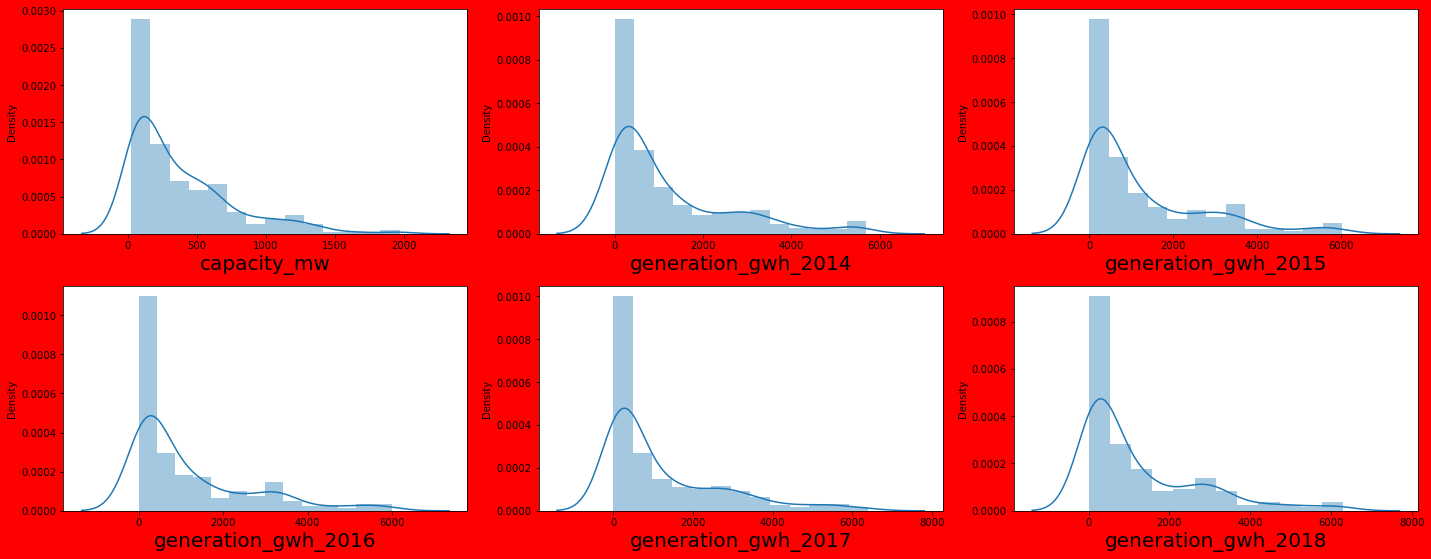

In [48]:
plt.figure(figsize=(20,15), facecolor='red')
plotnumber = 1

for column in x:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)#Print in 2 rows and 4 columns plotnumer = position
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [ ]:
`